In [ ]:
""" In Assignment 1, we have done image preprocessing. The tasks for this assignment are listed below.
1. Find a suitable segmentation method to extract the Region of Interest in your computer vision application. Justify why that particular
segmentation algorithm works out for your image.
2. Calculate the metricsPixel AccuracyIntersection-Over-Union (Jaccard Index)Dice Coefficient (F1 Score) """

' In Assignment 1, we have done image preprocessing. The tasks for this assignment are listed below.\n1. Find a suitable segmentation method to extract the Region of Interest in your computer vision application. Justify why that particular\nsegmentation algorithm works out for your image.\n2. Calculate the metricsPixel AccuracyIntersection-Over-Union (Jaccard Index)Dice Coefficient (F1 Score) '

In [ ]:
%autosave 1

Autosaving every 1 seconds


**Original Image**

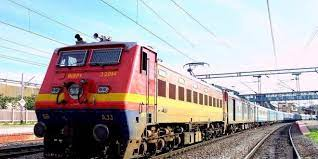

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image_path = "/content/img.jpg"
image = cv2.imread(image_path)
if image is None:
    print("Error: Image not found or cannot be opened.")
else:
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

HOG

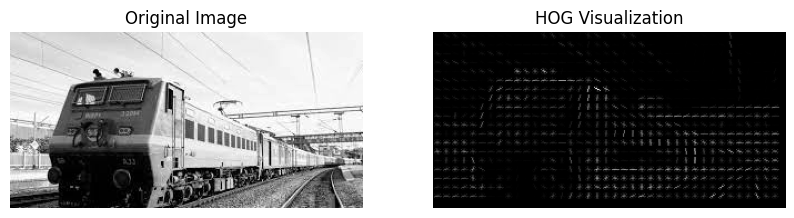

In [ ]:
from skimage.feature import hog
import matplotlib.pyplot as plt

image = cv2.imread('/content/img.jpg', cv2.IMREAD_GRAYSCALE)

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Compute HOG features
hog_features, hog_image = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                             cells_per_block=cells_per_block, visualize=True)

# Display the original image and the HOG visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.axis('off')

plt.show()

**Canny**

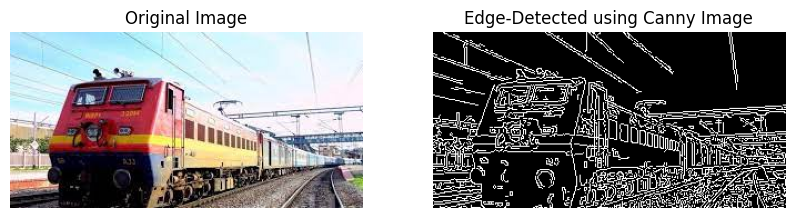

In [ ]:
def apply_canny_edge_detection(image, min_threshold, max_threshold):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray_image, min_threshold, max_threshold)
    return edges
image = cv2.imread('/content/img.jpg')

min_threshold = 50
max_threshold = 150

edges = apply_canny_edge_detection(image, min_threshold, max_threshold)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge-Detected using Canny Image')
plt.axis('off')
plt.show()

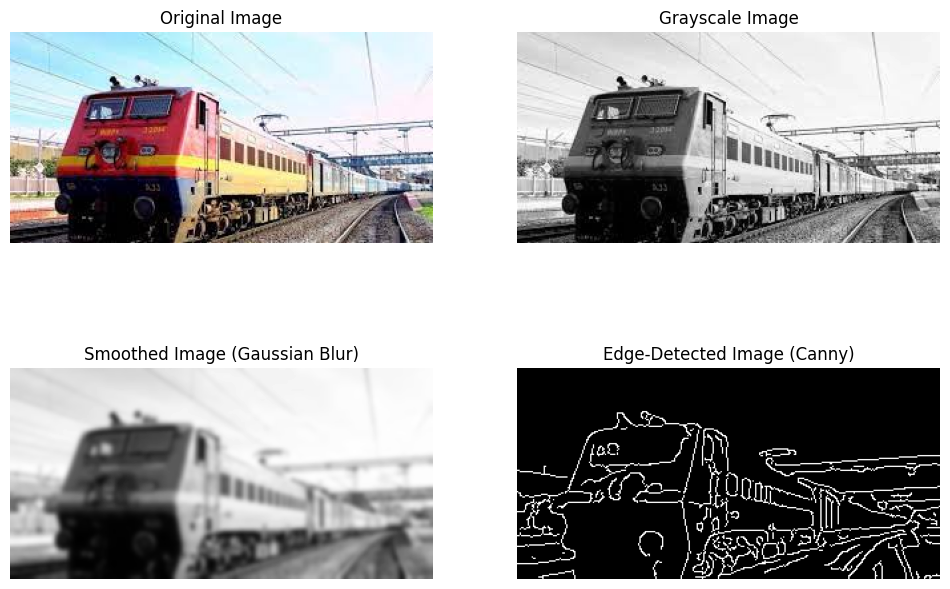

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
sigma = 1.8  # Adjust the sigma value as needed for the desired smoothing effect
smoothed_image = cv2.GaussianBlur(gray_image, (0, 0), sigma)

min_threshold = 30  
max_threshold = 100
edges = cv2.Canny(smoothed_image, min_threshold, max_threshold)

# Display the original image, grayscale image, smoothed image, and edge-detected image
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges, cmap='gray')
plt.title('Edge-Detected Image (Canny)')
plt.axis('off')

plt.show()

**Sobel Operator**

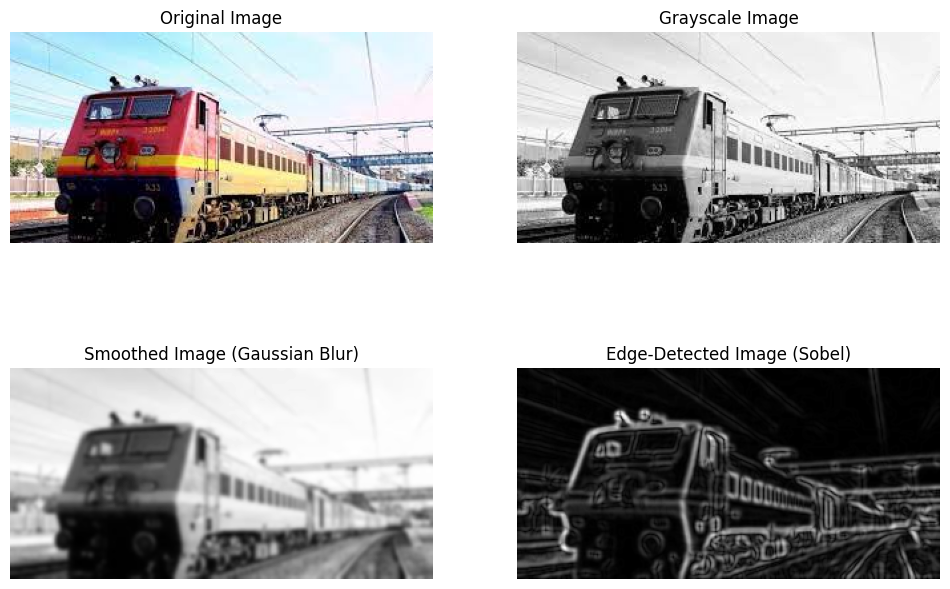

In [ ]:
sigma = 1.5
smoothed_image = cv2.GaussianBlur(gray_image, (0, 0), sigma)
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

edges_sobel = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Edge-Detected Image (Sobel)')
plt.axis('off')
plt.show()

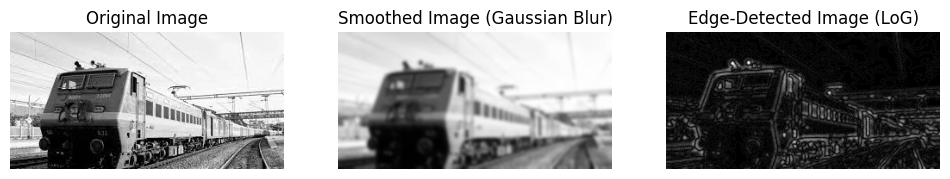

In [ ]:
sigma = 1.8 
smoothed_image = cv2.GaussianBlur(image, (0, 0), sigma)

log_image = cv2.Laplacian(smoothed_image, cv2.CV_64F)
log_image_abs = np.abs(log_image)
log_image_8bit = np.uint8(log_image_abs)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(log_image_8bit, cmap='gray')
plt.title('Edge-Detected Image (LoG)')
plt.axis('off')

plt.show()


**Scharr Operator**

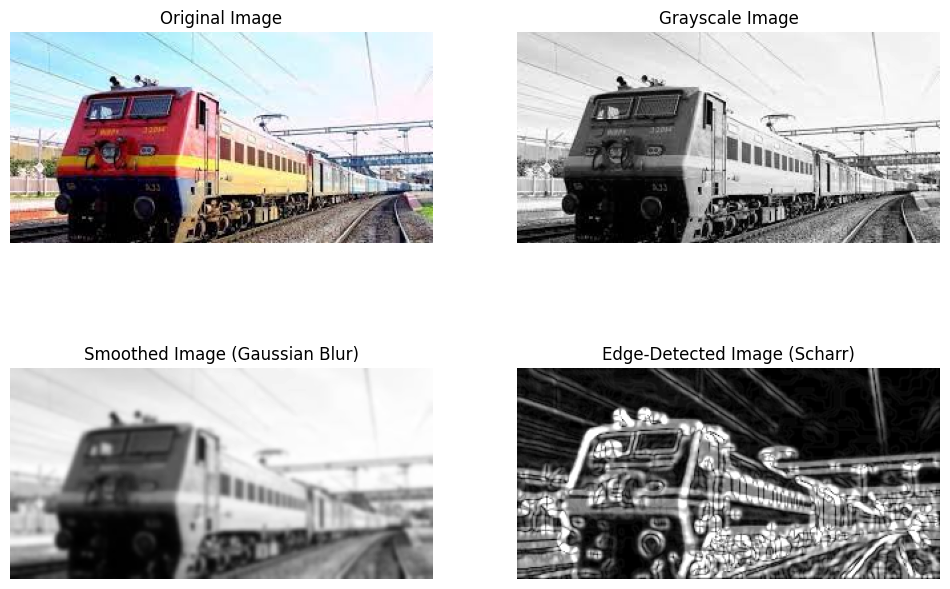

In [ ]:
sigma = 1.5  
smoothed_image = cv2.GaussianBlur(gray_image, (0, 0), sigma)

sobel_x = cv2.Scharr(smoothed_image, cv2.CV_64F, 1, 0)
sobel_y = cv2.Scharr(smoothed_image, cv2.CV_64F, 0, 1)

edges_scharr = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges_scharr, cmap='gray')
plt.title('Edge-Detected Image (Scharr)')
plt.axis('off')

plt.show()

**mean shifting region based**

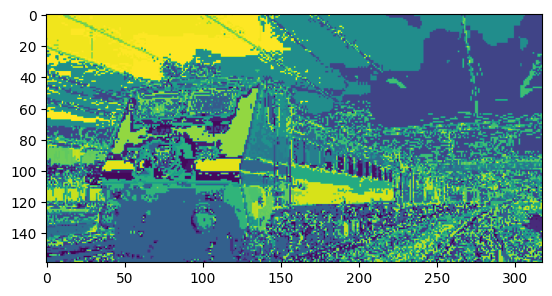

In [ ]:
# Reshape the image to a 2D array of pixels
pixels = gray_image.reshape(-1, 3)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels.astype(np.float32), 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

segmented_image = labels.reshape(image.shape[:2])
plt.imshow(segmented_image)

**K-Means Region Based**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


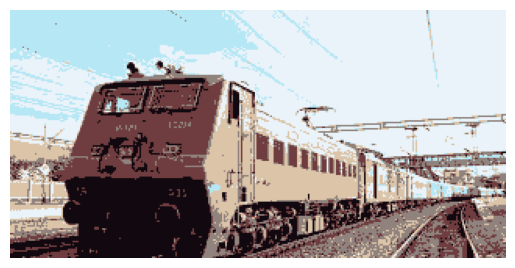

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Reshape the image to a 2D array of pixels
pixels = gray_image.reshape((-1, 3))

K = 6  
kmeans = KMeans(n_clusters=K).fit(pixels)

segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape).astype(np.uint8)

from matplotlib import pyplot as plt
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

**threshold based**

**Binary Image**

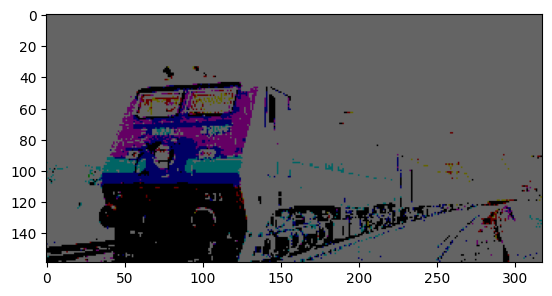

In [ ]:
_, binary_image = cv2.threshold(image, 50, 100, cv2.THRESH_BINARY)
plt.imshow(binary_image)

**Binary Inverse Image**

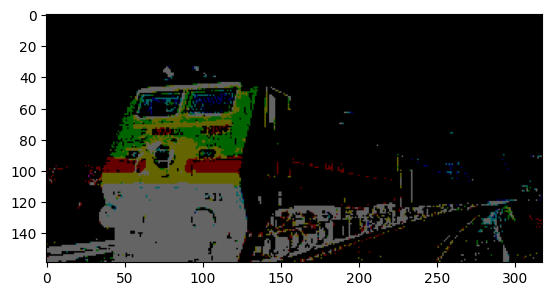

In [ ]:
_, binary_inverse_image = cv2.threshold(image, 50, 100, cv2.THRESH_BINARY_INV)
plt.imshow(binary_inverse_image)

**Otsu thresholding**

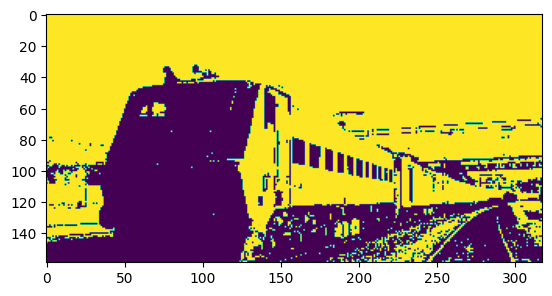

In [ ]:
_, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(image)
plt.imshow(thresholded_image)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

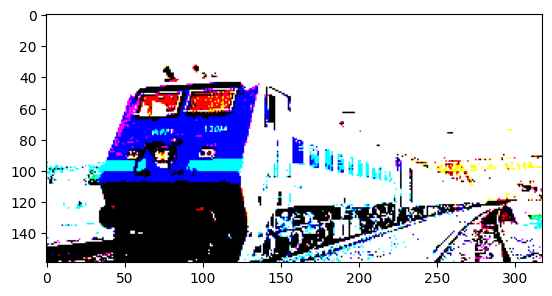

In [ ]:
_, binary_color_image = cv2.threshold(image, 80, 255, cv2.THRESH_BINARY)
plt.imshow(binary_color_image)

**Same Image - Ground and Predicted truth for metrics evaluation**

In [ ]:
# Load ground truth and predicted masks
ground_truth_mask = cv2.imread("/content/ground.png", cv2.IMREAD_GRAYSCALE)
predicted_mask = cv2.imread("/content/predicted.png", cv2.IMREAD_GRAYSCALE)

# Threshold the masks to binary (0 or 255) for pixel accuracy calculation
ground_truth_mask_binary = (ground_truth_mask > 0).astype(np.uint8) * 255
predicted_mask_binary = (predicted_mask > 0).astype(np.uint8) * 255

# Calculate pixel accuracy
pixel_accuracy = (ground_truth_mask_binary == predicted_mask_binary).mean()

# Calculate intersection and union for IoU
intersection = np.logical_and(ground_truth_mask_binary, predicted_mask_binary)
union = np.logical_or(ground_truth_mask_binary, predicted_mask_binary)

# Calculate IoU (Jaccard Index)
iou = intersection.sum() / union.sum()

# Calculate Dice coefficient (F1 Score)
dice_coefficient = (2 * intersection.sum()) / (ground_truth_mask_binary.sum() + predicted_mask_binary.sum())

# Print the metrics
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")
print(f"IoU (Jaccard Index): {iou:.4f}")
print(f"Dice Coefficient (F1 Score): {dice_coefficient:.4f}")


Pixel Accuracy: 0.9207
IoU (Jaccard Index): 0.7177
Dice Coefficient (F1 Score): 0.0033
